In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [348]:
data = pd.read_csv ('pre_post_full.csv')
data

,Number\n,Age\n(Years),Height \n(m),Weight\n(kg),BMI\n(kg/m^2),Waist circumference \n(cm),Systolic Blood Pressure at rest (mmHg),Diastolic Blood Pressure at rest (mmHg),Heart rate at rest\n(bpm),Body fat %,...,VT1 RER,VT2 FATox,VT2 CHOox,VT2 RER,VO2MAX \nFATox,VO2MAX\nCHOox,VO2MAX\nRER,PFO \n(g/min),PCHOox \n(g/min),PEAK\nRER
0,1001,25.0,1.78,-2.9,-0.92,-1.5,-10.0,-10.0,0.0,3.7,...,0.08,-0.05,0.16,0.06,-0.05,1.90,-0.12,0.12,0.80,-0.07
1,1015,20.0,1.82,-2.5,-0.75,-4.0,3.0,1.0,3.0,-0.3,...,-0.14,0.00,0.04,-0.10,0.05,1.15,-0.15,0.16,0.61,-0.19
2,1018,18.0,1.82,2.6,0.78,2.0,-3.0,8.0,2.0,3.2,...,0.15,0.05,0.21,-0.08,0.00,0.11,0.00,-0.11,1.24,-0.09
3,1019,20.0,1.82,-6.3,-1.89,-9.0,7.0,3.0,0.0,-4.1,...,0.22,0.00,0.33,0.03,0.00,0.40,-0.01,-0.04,1.34,0.06
4,1020,19.0,1.85,0.0,0.00,0.0,0.0,-9.0,-4.0,-5.6,...,0.00,0.00,-0.82,0.03,0.00,0.98,-0.10,0.01,0.78,-0.02
5,1021,22.0,1.80,0.0,0.00,0.0,8.0,0.0,-4.0,-3.7,...,0.19,0.00,-0.49,0.05,0.00,-0.67,0.03,-0.14,-0.66,0.01
6,1022,19.0,1.87,0.9,0.26,-2.0,-7.0,-9.0,-21.0,-0.1,...,0.08,0.00,0.59,-0.04,0.00,0.07,0.00,-0.12,1.15,-0.10
7,1023,22.0,1.88,1.0,0.28,0.0,10.0,-5.0,3.0,-23.4,...,0.15,0.00,0.46,-0.05,0.00,0.29,-0.03,0.02,0.34,-0.01
8,1024,20.0,1.76,1.4,0.45,4.0,-12.0,-9.0,-13.0,0.7,...,-0.06,0.00,1.21,-0.11,0.00,1.64,-0.13,-0.29,0.02,-0.18
9,1026,18.0,1.71,0.1,0.03,1.5,3.0,-10.0,26.0,-1.0,...,0.08,-0.04,-0.29,0.16,0.00,0.22,-0.02,0.04,0.47,-0.05


In [349]:
data.columns

Index(['Number\n', 'Age\n(Years)', 'Height \n(m)', 'Weight\n(kg)',
       'BMI\n(kg/m^2)', 'Waist circumference \n(cm)',
       'Systolic Blood Pressure at rest (mmHg)',
       'Diastolic Blood Pressure at rest (mmHg)', 'Heart rate at rest\n(bpm)',
       'Body fat %', 'Skeletal muscle mass\n(kg)',
       'Skeletal Muscle Mass Index\n(kg/m^2)', 'Visceral fat\n(Litres) ',
       'Resting metabolic rate (kcal/day)', 'RQ', '%  Fat', '% Carbohydrate',
       'Hand grip strength - dominant\n(kg)',
       'Normative Percentiles \n(Wang et al., 2019)',
       'Hand grip strength - non-dominant\n(kg)',
       'Hand grip strength -  Combined Score\n(kg)',
       'Normative Percentiles (Hoffmann et al., 2019)', 'Back strength\n(kg)',
       'Back strength/kg', 'Absolute\nVO2 max\n(L/min)',
       'Relative\nVO2 max\n(mL/kg/min)', 'VO2 max/\nSMM\n(mL/kg/min)',
       'Max Aerobic\nPower \n(Watts)', 'MAP/BW (W/kg)', 'MAP/SMM (W/kg)',
       'Normative Percentiles\n(Kaminsky et al., 2017)',
       

In [350]:
data1 = data.copy()
data1 = data[['Skeletal muscle mass\n(kg)',
       'Skeletal Muscle Mass Index\n(kg/m^2)', 
       'Hand grip strength - dominant\n(kg)',
       'Hand grip strength - non-dominant\n(kg)',
       'Hand grip strength -  Combined Score\n(kg)',
       'Back strength\n(kg)',
       'Back strength/kg',]]
data1

,Skeletal muscle mass\n(kg),Skeletal Muscle Mass Index\n(kg/m^2),Hand grip strength - dominant\n(kg),Hand grip strength - non-dominant\n(kg),Hand grip strength - Combined Score\n(kg),Back strength\n(kg),Back strength/kg
0,-3.4,-1.07,3.3,8.4,11.7,-27.5,-0.32
1,-0.7,-0.21,3.4,2.3,5.7,0.0,0.06
2,0.0,0.00,-4.3,-2.1,-6.4,-13.0,-0.21
3,0.7,0.21,6.4,6.6,13.0,-7.5,0.02
4,-0.8,-0.23,9.4,11.0,20.4,-14.5,-0.20
5,1.8,0.56,3.3,7.2,10.5,-45.7,-0.55
6,0.1,0.03,7.6,10.0,17.6,-6.5,-0.10
7,-0.4,-0.11,13.7,6.9,20.6,-1.0,-0.03
8,0.8,0.26,6.8,8.2,15.0,17.5,0.20
9,0.7,0.24,8.0,2.4,10.4,16.0,0.21


In [351]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data1)
data_scaled = pd.DataFrame(data_scaled[:,:], columns=data1.columns)
data_scaled

,Skeletal muscle mass\n(kg),Skeletal Muscle Mass Index\n(kg/m^2),Hand grip strength - dominant\n(kg),Hand grip strength - non-dominant\n(kg),Hand grip strength - Combined Score\n(kg),Back strength\n(kg),Back strength/kg
0,-2.549110,-2.594172,-0.571088,0.687041,0.146578,-1.210065,-1.142737
1,-0.403885,-0.399758,-0.546957,-0.504699,-0.618177,0.441388,0.698564
2,0.152284,0.136088,-2.405003,-1.364314,-2.160434,-0.339299,-0.609729
3,0.708454,0.671933,0.176957,0.335380,0.312275,-0.009008,0.504743
4,-0.483338,-0.450790,0.900871,1.194996,1.255473,-0.429378,-0.561274
5,1.582434,1.565008,-0.571088,0.452601,-0.006373,-2.303026,-2.257209
6,0.231737,0.212637,0.466522,0.999629,0.898588,0.051045,-0.076721
7,-0.165527,-0.144593,1.938481,0.393991,1.280965,0.381336,0.262466
8,0.787907,0.799515,0.273479,0.647968,0.567194,1.492313,1.376938
9,0.708454,0.748482,0.563044,-0.485162,-0.019119,1.402234,1.425393


In [352]:
wcss =[]

for i in range(1,12):
    kmeans = KMeans(i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

wcss1 = pd.DataFrame(wcss)
wcss1.to_csv('Pre Post SKM WCSS.csv')
wcss

[84.0,
 60.44482272904042,
 43.98393165469669,
 26.786014796626333,
 17.606798704631622,
 11.242505435155273,
 6.6026419305136015,
 4.274747847279124,
 2.6500186140482196,
 1.6898635477848711,
 0.824377120670283]

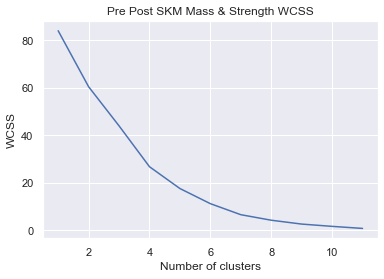

In [353]:
plt.plot(range(1,12),wcss)
plt.title('Pre Post SKM Mass & Strength WCSS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Pre Post SKM Mass & Strength PA WCSS.jpg')

In [354]:
data_scaled_2 = data_scaled.copy()
data_scaled_3 = data_scaled.copy()

In [355]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto")
data_scaled['clusters'] = clustering_kmeans.fit_predict(data_scaled)
data_scaled['clusters']

C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


0     1
1     0
2     0
3     3
4     1
5     2
6     3
7     3
8     3
9     3
10    1
11    0
Name: clusters, dtype: int32

In [356]:
data_scaled['clusters'].to_csv('Pre Post SKM Mass & Strength Clusters.csv')

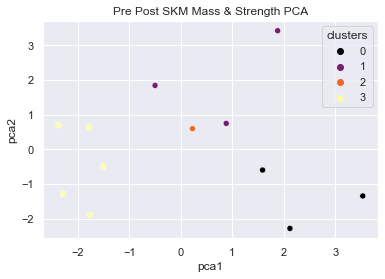

In [357]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results.to_csv('Pre Post SKM Mass & Strength PCAs.csv')

sns.scatterplot(x="pca1", y="pca2", palette=('inferno'), hue=data_scaled['clusters'], data=results)
plt.title('Pre Post SKM Mass & Strength PCA')
plt.savefig('Pre Post SKM Mass & Strength PCA.jpg')
plt.show()

In [358]:
kmeans_new = KMeans(4)
kmeans_new.fit(data_scaled_2)
clusters_new = data.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(data_scaled_2)

In [359]:
clusters_new

,Number\n,Age\n(Years),Height \n(m),Weight\n(kg),BMI\n(kg/m^2),Waist circumference \n(cm),Systolic Blood Pressure at rest (mmHg),Diastolic Blood Pressure at rest (mmHg),Heart rate at rest\n(bpm),Body fat %,...,VT2 FATox,VT2 CHOox,VT2 RER,VO2MAX \nFATox,VO2MAX\nCHOox,VO2MAX\nRER,PFO \n(g/min),PCHOox \n(g/min),PEAK\nRER,cluster_pred
0,1001,25.0,1.78,-2.9,-0.92,-1.5,-10.0,-10.0,0.0,3.7,...,-0.05,0.16,0.06,-0.05,1.90,-0.12,0.12,0.80,-0.07,0
1,1015,20.0,1.82,-2.5,-0.75,-4.0,3.0,1.0,3.0,-0.3,...,0.00,0.04,-0.10,0.05,1.15,-0.15,0.16,0.61,-0.19,1
2,1018,18.0,1.82,2.6,0.78,2.0,-3.0,8.0,2.0,3.2,...,0.05,0.21,-0.08,0.00,0.11,0.00,-0.11,1.24,-0.09,2
3,1019,20.0,1.82,-6.3,-1.89,-9.0,7.0,3.0,0.0,-4.1,...,0.00,0.33,0.03,0.00,0.40,-0.01,-0.04,1.34,0.06,1
4,1020,19.0,1.85,0.0,0.00,0.0,0.0,-9.0,-4.0,-5.6,...,0.00,-0.82,0.03,0.00,0.98,-0.10,0.01,0.78,-0.02,1
5,1021,22.0,1.80,0.0,0.00,0.0,8.0,0.0,-4.0,-3.7,...,0.00,-0.49,0.05,0.00,-0.67,0.03,-0.14,-0.66,0.01,3
6,1022,19.0,1.87,0.9,0.26,-2.0,-7.0,-9.0,-21.0,-0.1,...,0.00,0.59,-0.04,0.00,0.07,0.00,-0.12,1.15,-0.10,1
7,1023,22.0,1.88,1.0,0.28,0.0,10.0,-5.0,3.0,-23.4,...,0.00,0.46,-0.05,0.00,0.29,-0.03,0.02,0.34,-0.01,1
8,1024,20.0,1.76,1.4,0.45,4.0,-12.0,-9.0,-13.0,0.7,...,0.00,1.21,-0.11,0.00,1.64,-0.13,-0.29,0.02,-0.18,1
9,1026,18.0,1.71,0.1,0.03,1.5,3.0,-10.0,26.0,-1.0,...,-0.04,-0.29,0.16,0.00,0.22,-0.02,0.04,0.47,-0.05,1


In [360]:
clusters_new.to_csv('Pre Post SKM Mass & Strength (4 clusters).csv')

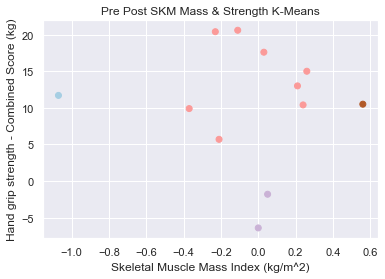

In [361]:
plt.scatter(clusters_new['Skeletal Muscle Mass Index\n(kg/m^2)'],clusters_new['Hand grip strength -  Combined Score\n(kg)'], c=clusters_new['cluster_pred'],cmap='Paired')
plt.title('Pre Post SKM Mass & Strength K-Means')
plt.xlabel('Skeletal Muscle Mass Index (kg/m^2)')
plt.ylabel('Hand grip strength - Combined Score (kg)')
#add legend with class names
plt.savefig('Pre Post SKM Mass & Strength (4c).jpg')
plt.show()

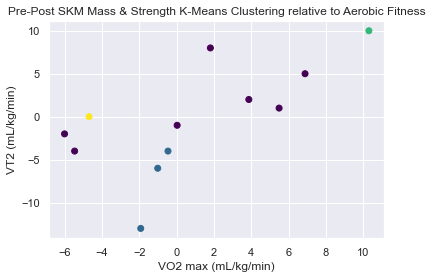

In [362]:
kmeans_new = KMeans(4)
kmeans_new.fit(data_scaled_3)
clusters_new_1 = data.copy()
clusters_new_1['cluster_pred'] = kmeans_new.fit_predict(data_scaled_3)

clusters_new_1.to_csv('Pre Post SKM Mass & Strength K-Means by VO2max & VT2 (4 clusters).csv')

plt.scatter(clusters_new_1['Relative\nVO2 max\n(mL/kg/min)'],clusters_new_1['Ventilatory threshold 2\n(mL/kg/min)'],c=clusters_new_1['cluster_pred'],cmap='viridis')
plt.title('Pre-Post SKM Mass & Strength K-Means Clustering relative to Aerobic Fitness')
plt.xlabel('VO2 max (mL/kg/min)')
plt.ylabel('VT2 (mL/kg/min)')
plt.savefig('Pre-Post SKM Mass & Strength K-Means by VO2max & VT2 (4c).jpg')
plt.show()
